In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [33]:
# Get best transformer result

folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "transformer"  # the substring to look for
step = "h_1"
option = 'put'

lowest_value = float('inf')
lowest_file_short = None
i = 0
for file_name in os.listdir(folder_path):
   
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name and option in file_name:
        i=i+1
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name
                

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")
print(i)


Lowest value: 0.11886195458144166
From file: put_smooth_True_ws_21_h_1_4_64_transformer.npy
54


In [34]:
option, _, _, _, ws, _, h_step, num_head, key_dim, _ = lowest_file_short.split("_")

In [35]:
test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")

print(f"h = {h_step} ahead prediction for {option} option:")
print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
print(f"Best hyperparameters: window size {ws}, number of attention heads: {num_head}, key_dim: {key_dim}")

h = 1 ahead prediction for put option:
IVRMSE: 0.135, R_oos: 0.797
Best hyperparameters: window size 21, number of attention heads: 4, key_dim: 64


In [ ]:
# Make a weights figure
lowest_file_weights = lowest_file_short.replace("smooth", "sm")
weights = np.load(f"results/attention_weights/short_ttm_{lowest_file_weights}")
print(weights.shape)

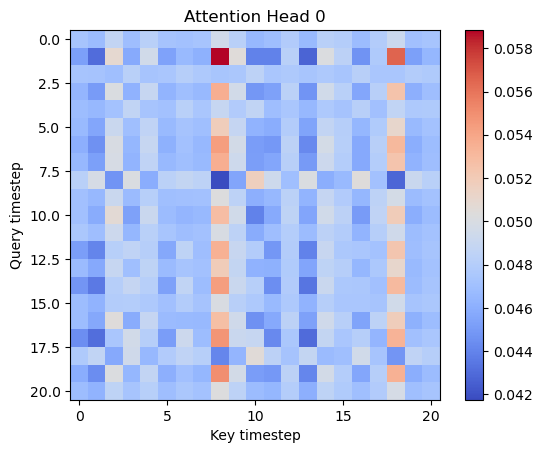

In [44]:
plt.imshow(weights[0,0], cmap='coolwarm')
plt.title("Attention Head 0")
plt.xlabel("Key timestep")
plt.ylabel("Query timestep")
plt.colorbar()
plt.show()

C:\Users\hydra\AppData\Local\Temp\ipykernel_15128\1753478709.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


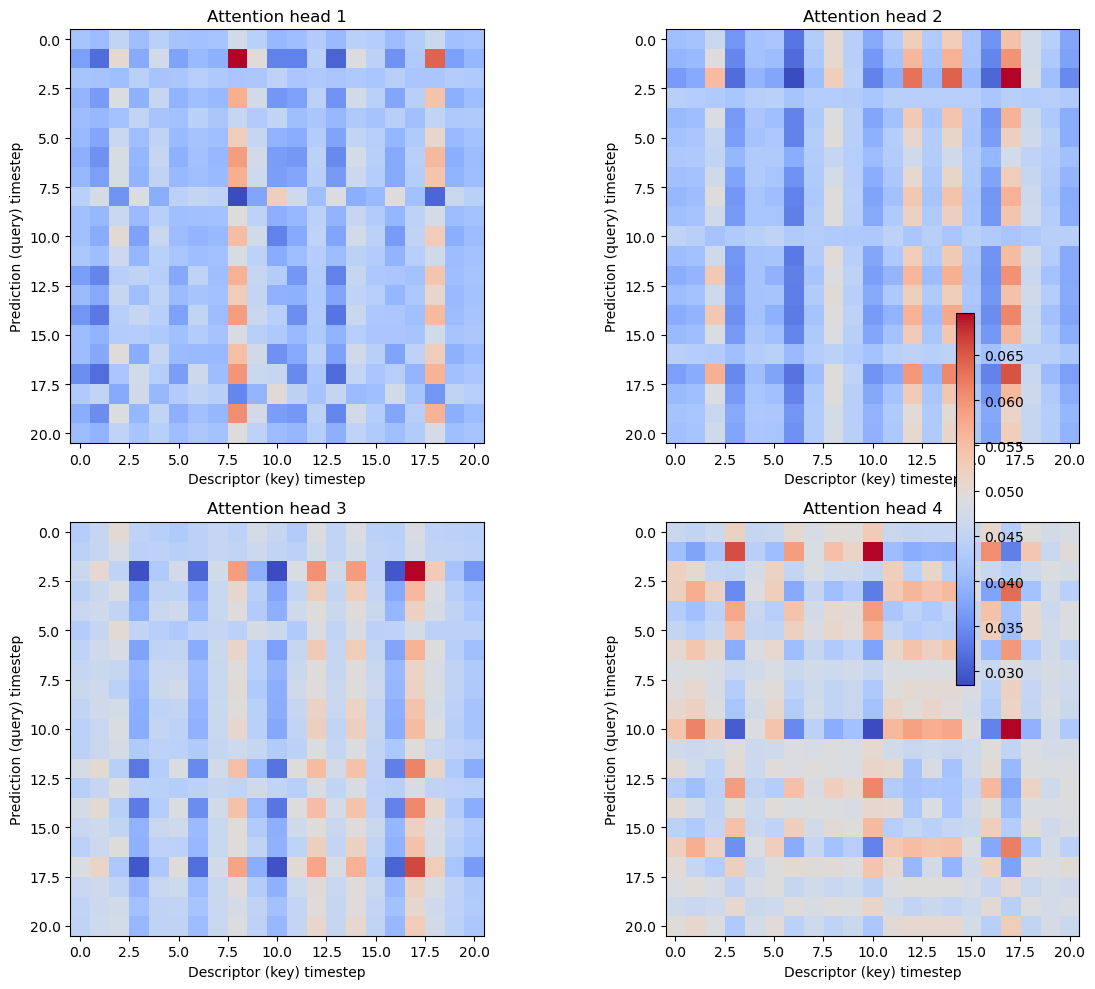

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

im00 = axs[0,0].imshow(weights[0,0], cmap='coolwarm')
axs[0,0].set_title("Attention head 1")
axs[0,0].set_ylabel("Prediction (query) timestep")
axs[0,0].set_xlabel("Descriptor (key) timestep")

im01 = axs[0,1].imshow(weights[0,1], cmap='coolwarm')
axs[0,1].set_title("Attention head 2")
axs[0,1].set_ylabel("Prediction (query) timestep")
axs[0,1].set_xlabel("Descriptor (key) timestep")

im10 = axs[1,0].imshow(weights[0,2], cmap='coolwarm')
axs[1,0].set_title("Attention head 3")
axs[1,0].set_ylabel("Prediction (query) timestep")
axs[1,0].set_xlabel("Descriptor (key) timestep")

im11 = axs[1,1].imshow(weights[0,3], cmap='coolwarm')
axs[1,1].set_title("Attention head 4")
axs[1,1].set_ylabel("Prediction (query) timestep")
axs[1,1].set_xlabel("Descriptor (key) timestep")

# Create a single colorbar for all
fig.colorbar(im11, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()


C:\Users\hydra\AppData\Local\Temp\ipykernel_15128\2226466674.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


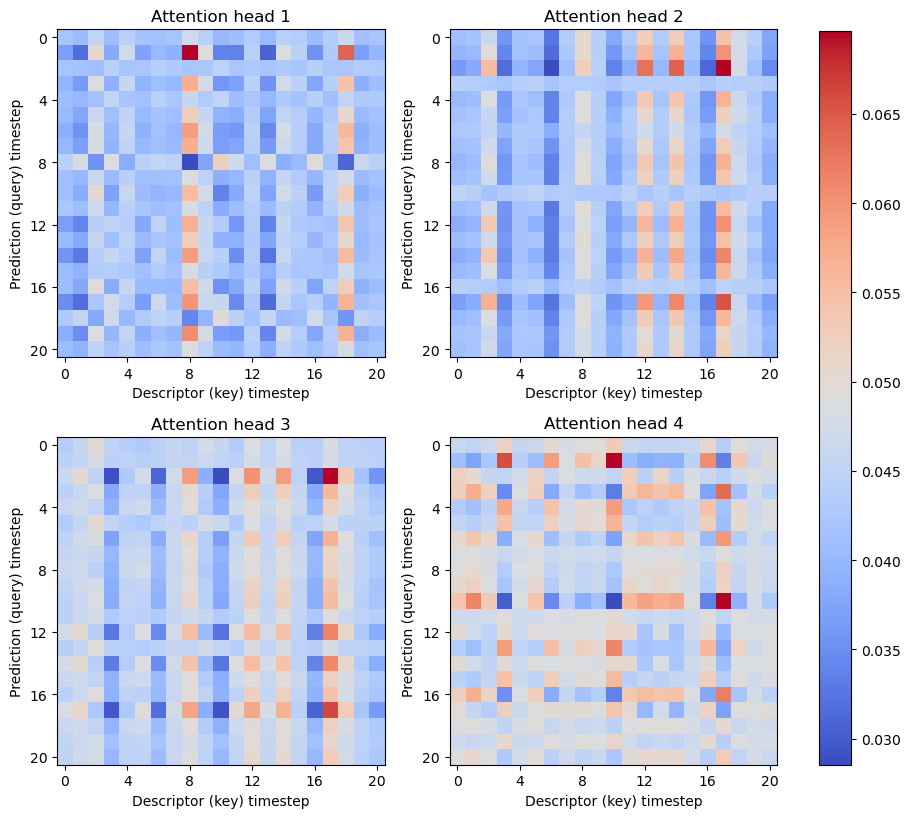

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8,8.3))

titles = ["Attention head 1", "Attention head 2", "Attention head 3", "Attention head 4"]
idx = 0
for i in range(2):
    for j in range(2):
        im = axs[i, j].imshow(weights[0, idx], cmap='coolwarm')
        axs[i, j].set_title(titles[idx])
        axs[i, j].set_xlabel("Descriptor (key) timestep")
        axs[i, j].set_ylabel("Prediction (query) timestep")

        # 🔢 Set custom ticks
        axs[i, j].set_xticks(range(0, 21, 4))
        axs[i, j].set_yticks(range(0, 21, 4))
        idx += 1

# Adjust space for colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([1.03, 0.07, 0.04, 0.885]) 
fig.colorbar(im, cax=cbar_ax)

plt.tight_layout()
plt.show()
